### Why I choose the "Global Country Information Dataset 2023" Dataset

As my major is Foreign Affairs, I thought that looking at a dataset that includes different metrics for each country would be a cool way to merge my knowledge in my major and minor.

This dataset includes many interesting metrics, such as Co2 emissions, birth rate, GDP, and many other data points. Using these data for a dashboard could be fascinating to look at GDP and Co2 emissions of each country, the relationship between birth rate and out of pocket health expenditures, or to even just give a brief overview about each country to the user. Moreover, since the data were collected in 2023, it can give the user a more current understanding of what many countries face contemporarily, both challenges and successes. 

### Data Provenance

The dataset was originally downloaded locally on February 20, 2024. The dataset can be found at this [Kaggle website link.](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023) 

The dataset used in this project is Version 1, entitled world-data-2023.csv. 

The collaborator and owner of the dataset is Nidula Elgiriyewithana. They cite they used multiple data sources, not specifically stating which sources, and their collection methodology was Python.




In [66]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the csv file
df = pd.read_csv(r'C:\Users\emily\OneDrive\Desktop\DS4003\world-data-2023.csv')

Firstly, starting to look at the dataframe and what it includes uncleaned

In [3]:
# Looking at the shape of the df, x= country name, y = variable measured (ex. GDP)
print(df.shape)

(195, 35)


In [4]:
# Looking at the variable types
print(df.dtypes)

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [5]:
# Looking at columns 2-7, randomly chosen to just see names
print(df.columns[2:7])

Index(['Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate'],
      dtype='object')


In [6]:
# Looking at all the columns by putting them in a list
column_list = []
for col in df.columns:
    column_list.append(str(col))
print(column_list)

['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Largest city', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Official language', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


I am dropping the following columns because of many different reasons. Abbreviations are not useful for any visualization.


Density, calling code, currency code, forested area (%), largest area, gross primary education enrollment (%), gross tertiary education enrollment (%) are not a variables that are not being used for analysis since they are not particularly significant in comparing among countries. 

Urban population is not included because of each country's population varies greatly. Minimum wage is not included because the Kaggle document says that minimum wage is in local currency but the values are in USD and therefore the discrepancy is too great to keep in the dataframe.

Total tax rate, maternal mortality ratio, physicians per thousand, and Population: Labor force participation (%) were just variables that were not relevant for the dashboard visualizations.

In [7]:
# Now dropping the unwanted columns
df = df.drop(columns=['Abbreviation', 'Density\n(P/Km2)', 'Calling Code', 'Currency-Code', 
                      'Forested Area (%)', 'Largest city', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
                      'Urban_population', 'Minimum wage', 'Total tax rate', 'Maternal mortality ratio', 
                      'Physicians per thousand', 'Population: Labor force participation (%)'])

In [8]:
# Check if the columns were dropped
for col in df.columns:
    print(col)

Country
Agricultural Land( %)
Land Area(Km2)
Armed Forces size
Birth Rate
Capital/Major City
Co2-Emissions
CPI
CPI Change (%)
Fertility Rate
Gasoline Price
GDP
Infant mortality
Life expectancy
Official language
Out of pocket health expenditure
Population
Tax revenue (%)
Unemployment rate
Latitude
Longitude


In [9]:
# Renaming the columns to make it easier to reference
df = df.rename(columns= {'Agricultural Land( %)': 'agr_land',
                         'Land Area(Km2)': 'land_area',
                         'Armed Forces size': 'armed_force',
                         'Capital/Major City': 'cap_city',
                         'Co2-Emissions': 'Co2',
                         'CPI Change (%)': 'CPI_change',
                         'Fertility Rate': 'fert_rate',
                         'Gasoline Price': 'gas',
                         'Infant mortality': 'child_death',
                         'Life expectancy' : 'life_expect',
                         'Official language': 'lang',
                         'Out of pocket health expenditure': 'health_cost',
                         'Population': 'pop',
                         'Tax revenue (%)': 'tax_rev',
                         'Total tax rate': 'tax_rate',
                         'Unemployment rate' : 'unemploy',
                         'Latitude': 'lat',
                         'Longitude' : 'lat'
                         }
               )


In [10]:
for col in df.columns:
    print(col)

Country
agr_land
land_area
armed_force
Birth Rate
cap_city
Co2
CPI
CPI_change
fert_rate
gas
GDP
child_death
life_expect
lang
health_cost
pop
tax_rev
unemploy
lat
lat


Now, with renamed columns, let's take a look at each variable and clean them up even more.

In [11]:
# Let's look at the Country column to see if anything is looking strange
Country_list = df['Country'].tolist()
print(Country_list)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Vatican City', 'Honduras', 'Hungary', 'Iceland', 'India', 'I

In [12]:
# Let's drop the country "S�����������", because this is not a country
df = df[df['Country'] != 'S�����������']

In [13]:
# See if it's still there
Country_list2 = df['Country'].tolist()
print(Country_list2)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Vatican City', 'Honduras', 'Hungary', 'Iceland', 'India', 'I

In [14]:
# Let's take a look at the missing values for each column
df.isna().sum()

Country         0
agr_land        7
land_area       1
armed_force    24
Birth Rate      6
cap_city        3
Co2             7
CPI            17
CPI_change     16
fert_rate       7
gas            19
GDP             2
child_death     6
life_expect     8
lang            4
health_cost     7
pop             1
tax_rev        26
unemploy       19
lat             0
lat             0
dtype: int64

There are a few missing items in almost every variable. Based off this, I will drop the "armed_force", since there are 25 missing vlaues in this column. 

In [15]:
df = df.drop(columns='armed_force') 

In [16]:
# Looking at each country and seeing how many NaNs they have
country_nan = df.isna().sum(axis=1)

df[country_nan >= 3]['Country'].tolist()

['Andorra',
 'Cuba',
 'Eritrea',
 'Eswatini',
 'Vatican City',
 'Liechtenstein',
 'Marshall Islands',
 'Monaco',
 'Nauru',
 'North Korea',
 'North Macedonia',
 'Palestinian National Authority',
 'San Marino',
 'Somalia',
 'Turkmenistan',
 'Tuvalu']

Looking at the countries, these have 3 or more missing data (NaNs) for the respective columns. A few of these countries, such as Cuba, North Korea, and Turkmenistan, have authoritarian governments, which might have an incentive to not include certain data to report, hence them missing data. Others might be developing nations and therefore might lack the infrastructure to collect respective data. Nevertheless, I will be dropping these countries for analysis/dashboard purposes. 

In [17]:
df = df[country_nan <= 2]
df.head()

,Country,agr_land,land_area,Birth Rate,cap_city,Co2,CPI,CPI_change,fert_rate,gas,GDP,child_death,life_expect,lang,health_cost,pop,tax_rev,unemploy,lat,lat
0,Afghanistan,58.10%,"652,230",32.49,Kabul,"8,672",149.9,2.30%,4.47,$0.70,"$19,101,353,833",47.9,64.5,Pashto,78.40%,"38,041,754",9.30%,11.12%,33.939110,67.709953
1,Albania,43.10%,"28,748",11.78,Tirana,"4,536",119.05,1.40%,1.62,$1.36,"$15,278,077,447",7.8,78.5,Albanian,56.90%,"2,854,191",18.60%,12.33%,41.153332,20.168331
2,Algeria,17.40%,"2,381,741",24.28,Algiers,"150,006",151.36,2.00%,3.02,$0.28,"$169,988,236,398",20.1,76.7,Arabic,28.10%,"43,053,054",37.20%,11.70%,28.033886,1.659626
4,Angola,47.50%,"1,246,700",40.73,Luanda,"34,693",261.73,17.10%,5.52,$0.97,"$94,635,415,870",51.6,60.8,Portuguese,33.40%,"31,825,295",9.20%,6.89%,-11.202692,17.873887
5,Antigua and Barbuda,20.50%,443,15.33,"St. John's, Saint John",557,113.81,1.20%,1.99,$0.99,"$1,727,759,259",5.0,76.9,English,24.30%,"97,118",16.50%,NaN,17.060816,-61.796428


Now, I am going to convert the data types. Most notably, if there is a percentage value, I will convert it to a float. If it text, I will conver it to a string.

In [18]:
# What the data types are before cleaning
print(df.dtypes)

Country         object
agr_land        object
land_area       object
Birth Rate     float64
cap_city        object
Co2             object
CPI             object
CPI_change      object
fert_rate      float64
gas             object
GDP             object
child_death    float64
life_expect    float64
lang            object
health_cost     object
pop             object
tax_rev         object
unemploy        object
lat            float64
lat            float64
dtype: object


In [19]:
# Make sure the 'Country' column has string values
string_columns = ['Country', 'cap_city', 'lang']
df[string_columns] = df[string_columns].astype(str)

In [20]:
# Getting rid of extra text from the cap_city column (any additional information is seperated by a comma)
df['cap_city'] = df['cap_city'].str.split(',').str.get(0)

In [21]:
# Making 'arg_land' into a float
df['agr_land'] = df['agr_land'].str.strip('%').astype(float)

In [22]:
# Making land area into a float
df['land_area'] = df['land_area'].str.replace(',', '').astype(float)

In [24]:
# Making CPI into a float
df['CPI'] = df['CPI'].str.replace(',', '').astype(float)

In [25]:
# Making CPI_change into a float
df['CPI_change'] = df['CPI_change'].str.strip('%').astype(float)
df.head()

,Country,agr_land,land_area,Birth Rate,cap_city,Co2,CPI,CPI_change,fert_rate,gas,GDP,child_death,life_expect,lang,health_cost,pop,tax_rev,unemploy,lat,lat
0,Afghanistan,58.1,652230.0,32.49,Kabul,"8,672",149.90,2.3,4.47,$0.70,"$19,101,353,833",47.9,64.5,Pashto,78.40%,"38,041,754",9.30%,11.12%,33.939110,67.709953
1,Albania,43.1,28748.0,11.78,Tirana,"4,536",119.05,1.4,1.62,$1.36,"$15,278,077,447",7.8,78.5,Albanian,56.90%,"2,854,191",18.60%,12.33%,41.153332,20.168331
2,Algeria,17.4,2381741.0,24.28,Algiers,"150,006",151.36,2.0,3.02,$0.28,"$169,988,236,398",20.1,76.7,Arabic,28.10%,"43,053,054",37.20%,11.70%,28.033886,1.659626
4,Angola,47.5,1246700.0,40.73,Luanda,"34,693",261.73,17.1,5.52,$0.97,"$94,635,415,870",51.6,60.8,Portuguese,33.40%,"31,825,295",9.20%,6.89%,-11.202692,17.873887
5,Antigua and Barbuda,20.5,443.0,15.33,St. John's,557,113.81,1.2,1.99,$0.99,"$1,727,759,259",5.0,76.9,English,24.30%,"97,118",16.50%,NaN,17.060816,-61.796428


In [26]:
# Making the rest of the categories with a percentage value into floats
df['health_cost'] = df['health_cost'].str.strip('%').astype(float)

In [27]:
# Tax revenue into a float
df['tax_rev'] = df['tax_rev'].str.strip('%').astype(float)

In [28]:
# Unemployement rate into a float
df['unemploy'] = df['unemploy'].str.strip('%').astype(float)

In [30]:
# Transforming the money-valued categories (i.e $50,000) into floats

#First, making them as strings
df['gas'] = df['gas'].astype(str)

# # Then, replacing the $ and stripping other characters before converting to a float
df['gas'] = df['gas'].str.replace('$', '').str.replace(',','').astype(float)


In [31]:
#GDP conversion
df['GDP'] = df['GDP'].astype(str)
df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',','').astype(float)

In [32]:
#Co2 conversion
df['Co2'] = df['Co2'].astype(str)
df['Co2'] = df['Co2'].str.replace(',','').astype(float)

In [33]:
# Population (pop) conversion 
df['pop'] = df['pop'].astype(str)
df['pop'] = df['pop'].str.replace(',','').astype(float)

In [34]:
# Dividing the GDP variable by a million to make the value more easily manipulated
df['GDP'] = df['GDP']/1000000

Time for exploratory analysis!

In [35]:
# Taking a peak at how the dataset is looking
df.head()

,Country,agr_land,land_area,Birth Rate,cap_city,Co2,CPI,CPI_change,fert_rate,gas,GDP,child_death,life_expect,lang,health_cost,pop,tax_rev,unemploy,lat,lat
0,Afghanistan,58.1,652230.0,32.49,Kabul,8672.0,149.90,2.3,4.47,0.70,19101.353833,47.9,64.5,Pashto,78.4,38041754.0,9.3,11.12,33.939110,67.709953
1,Albania,43.1,28748.0,11.78,Tirana,4536.0,119.05,1.4,1.62,1.36,15278.077447,7.8,78.5,Albanian,56.9,2854191.0,18.6,12.33,41.153332,20.168331
2,Algeria,17.4,2381741.0,24.28,Algiers,150006.0,151.36,2.0,3.02,0.28,169988.236398,20.1,76.7,Arabic,28.1,43053054.0,37.2,11.70,28.033886,1.659626
4,Angola,47.5,1246700.0,40.73,Luanda,34693.0,261.73,17.1,5.52,0.97,94635.415870,51.6,60.8,Portuguese,33.4,31825295.0,9.2,6.89,-11.202692,17.873887
5,Antigua and Barbuda,20.5,443.0,15.33,St. John's,557.0,113.81,1.2,1.99,0.99,1727.759259,5.0,76.9,English,24.3,97118.0,16.5,NaN,17.060816,-61.796428


In [44]:
# To make EDA easier, I am setting the index as country so I can see data by country.
df.set_index('Country', inplace = True)

In [36]:
# Looking at the data types to make sure that everything is converted to either a float or string
df.dtypes

Country         object
agr_land       float64
land_area      float64
Birth Rate     float64
cap_city        object
Co2            float64
CPI            float64
CPI_change     float64
fert_rate      float64
gas            float64
GDP            float64
child_death    float64
life_expect    float64
lang            object
health_cost    float64
pop            float64
tax_rev        float64
unemploy       float64
lat            float64
lat            float64
dtype: object

In [37]:
# Take a look through how many observations there are
df.shape 
# There are 178 countries and 20 columns

(178, 20)

In [38]:
# Looking at the categorical variables, Country, Capital City, and Language
print(df['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'The Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Ivory Coast' 'Cape Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Republic of the Congo' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' 'Democratic Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Republic of Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kirib

In [39]:
print(df['cap_city'].unique())

['Kabul' 'Tirana' 'Algiers' 'Luanda' "St. John's" 'Buenos Aires' 'Yerevan'
 'Canberra' 'Vienna' 'Baku' 'Nassau' 'Manama' 'Dhaka' 'Bridgetown' 'Minsk'
 'City of Brussels' 'Belmopan' 'Porto-Novo' 'Thimphu' 'Sucre' 'Sarajevo'
 'Gaborone' 'Bras���' 'Bandar Seri Begawan' 'Sofia' 'Ouagadougou'
 'Bujumbura' 'Yamoussoukro' 'Praia' 'Phnom Penh' 'Yaound�' 'Ottawa'
 'Bangui' "N'Djamena" 'Santiago' 'Beijing' 'Bogot�' 'Moroni' 'Brazzaville'
 'San Jos������' 'Zagreb' 'Nicosia' 'Prague' 'Kinshasa' 'Copenhagen'
 'Djibouti City' 'Roseau' 'Santo Domingo' 'Quito' 'Cairo' 'San Salvador'
 'Malabo' 'Tallinn' 'Addis Ababa' 'Suva' 'Helsinki' 'Paris' 'Libreville'
 'Banjul' 'Tbilisi' 'Berlin' 'Accra' 'Athens' "St. George's"
 'Guatemala City' 'Conakry' 'Bissau' 'Georgetown' 'Port-au-Prince'
 'Tegucigalpa' 'Budapest' 'Reykjav��' 'New Delhi' 'Jakarta' 'Tehran'
 'Baghdad' 'Dublin' 'Jerusalem' 'Rome' 'Kingston' 'Tokyo' 'Amman' 'Astana'
 'Nairobi' 'South Tarawa' 'Kuwait City' 'Bishkek' 'Vientiane' 'Riga'
 'Beirut' 'M

In [41]:
print(df['lang'].unique())
print(df['lang'].value_counts())

['Pashto' 'Albanian' 'Arabic' 'Portuguese' 'English' 'Spanish' 'Armenian'
 'nan' 'German' 'Azerbaijani language' 'Bengali' 'Russian' 'French'
 'Dzongkha' 'Bosnian' 'Malay' 'Bulgarian' 'Kirundi' 'Khmer language'
 'Standard Chinese' 'Croatian' 'Greek' 'Czech' 'Danish'
 'Modern Standard Arabic' 'Estonian' 'Amharic' 'Fiji Hindi' 'Swedish'
 'Georgian' 'Hungarian' 'Icelandic' 'Hindi' 'Indonesian' 'Persian' 'Irish'
 'Hebrew' 'Italian' 'Jamaican English' 'Swahili' 'Lao' 'Latvian'
 'Lithuanian' 'Luxembourgish' 'Malaysian language' 'Divehi' 'Maltese'
 'Romanian' 'Mongolian' 'Montenegrin language' 'Burmese' 'Nepali' 'Dutch'
 'Norwegian' 'Urdu' 'Tok Pisin' 'Polish' 'Samoan' 'Serbian' 'Slovak'
 'Slovene language' 'Afrikaans' 'Korean' 'Tamil' 'Thai' 'Tongan Language'
 'Turkish' 'Ukrainian' 'Uzbek' 'Vietnamese' 'Shona']
lang
English             29
French              24
Spanish             18
Arabic              16
Portuguese           7
                    ..
Hebrew               1
Italian          

The Country (Country) and Capital City (cap_city) categorical variables have unique categories, which makes sense given they are distinct countries and city names. 

The official language (lang) categorical variable has a few languages, such as English, French, and Spanish, that are repeated. This makes sense as languages are exclusive to a single country.

All three of these categorical variables are not hierarchical, they are all distinct and disjointed.

Now, let's look at the missing values

In [42]:
    # 3. How much missing data is there per observation or per variable?

# The number of missing values per variable. The variavbles with a significant amount of missing values are gas, tax_rev, and unemploy.
df.isna().sum()    

Country         0
agr_land        1
land_area       0
Birth Rate      0
cap_city        0
Co2             0
CPI             2
CPI_change      1
fert_rate       0
gas            12
GDP             0
child_death     0
life_expect     0
lang            0
health_cost     0
pop             0
tax_rev        14
unemploy        8
lat             0
lat             0
dtype: int64

In [55]:
# To find the number of missing values per row I am making a new df that sums the NaNs along axis 1 (rows)
nas_by_country = df.isna().sum(axis=1)
# Shows the countries that have two or more missing values. It looks like there are no countries with more than two. 
nas_by_country[nas_by_country >= 2]

Country
Comoros                           2
Dominica                          2
Kiribati                          2
Federated States of Micronesia    2
Palau                             2
Saint Kitts and Nevis             2
Seychelles                        2
South Sudan                       2
Uzbekistan                        2
dtype: int64

In [ ]:
    # 4. What are the distributions of continuous variables? Are there outliers?

I have 17 continuous variables. However, some variables, such as longtitude and latitude, are variables with no significance of their spread.
Therefore, I am not going to try to graph or do analysis on these.
There are going to be 

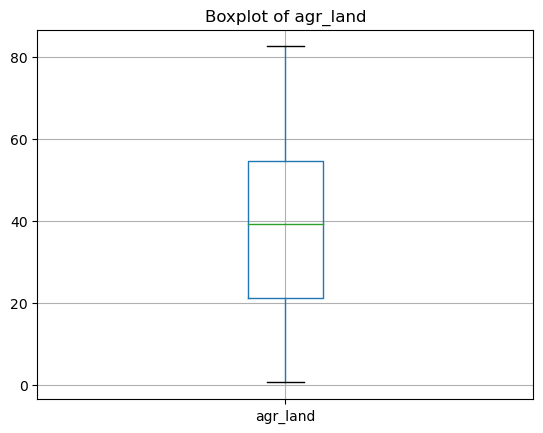

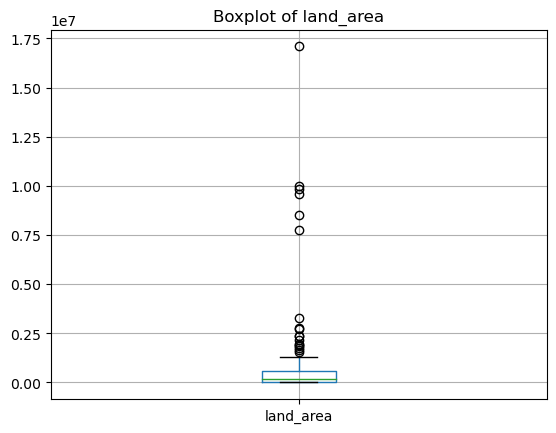

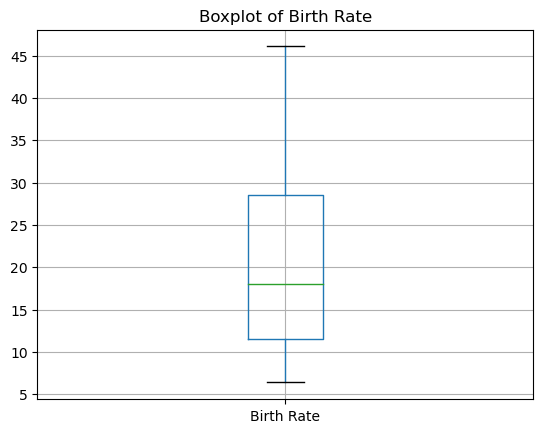

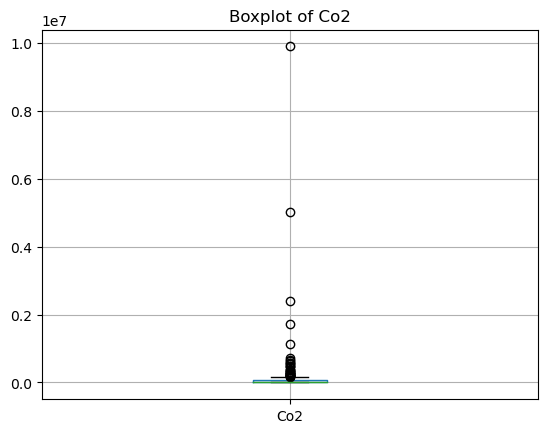

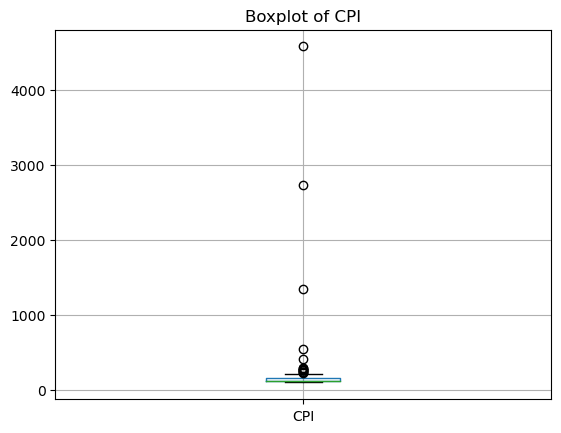

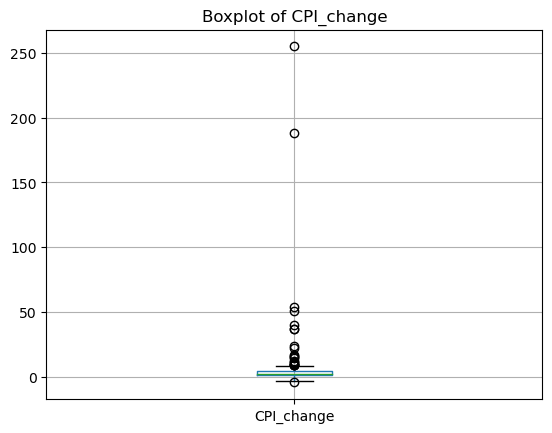

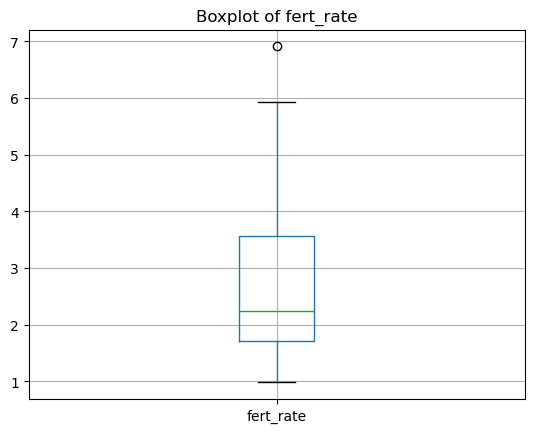

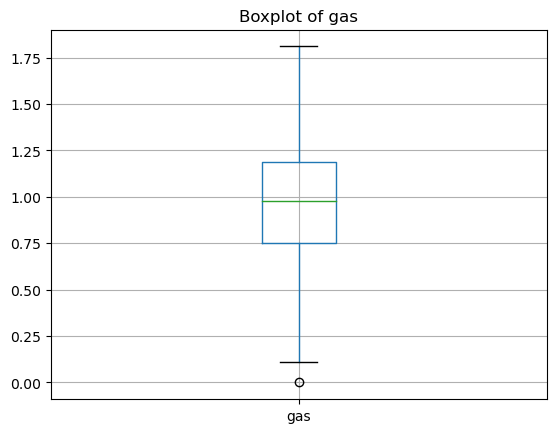

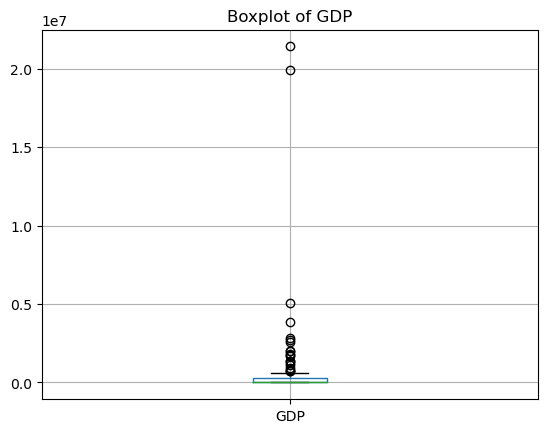

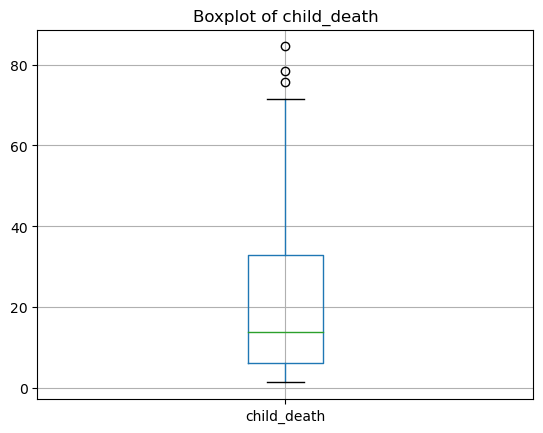

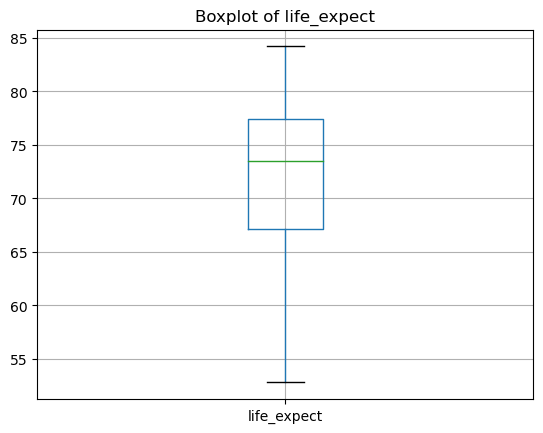

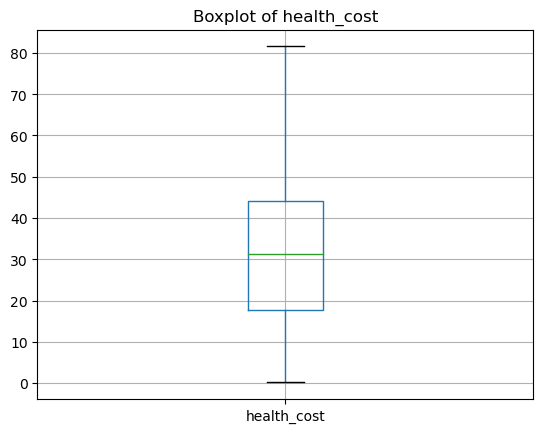

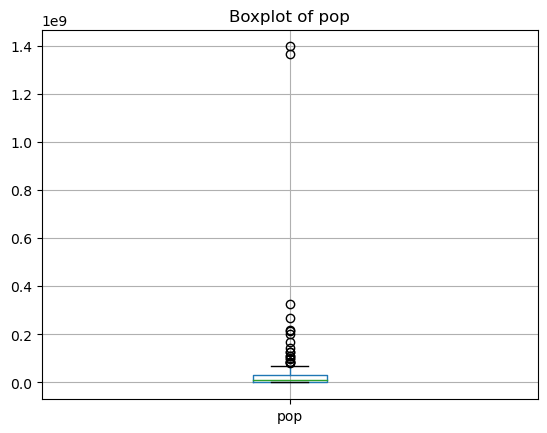

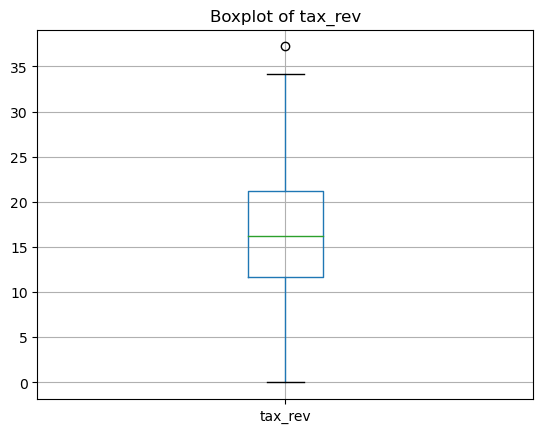

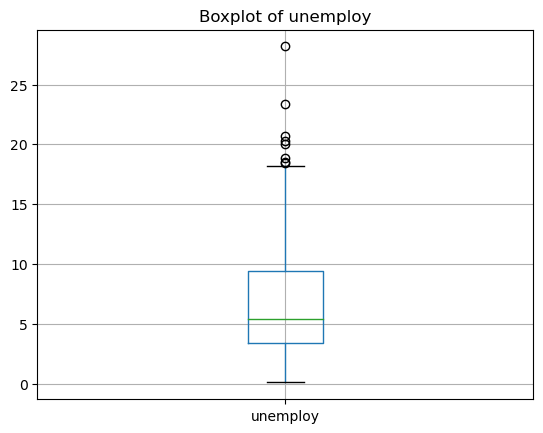

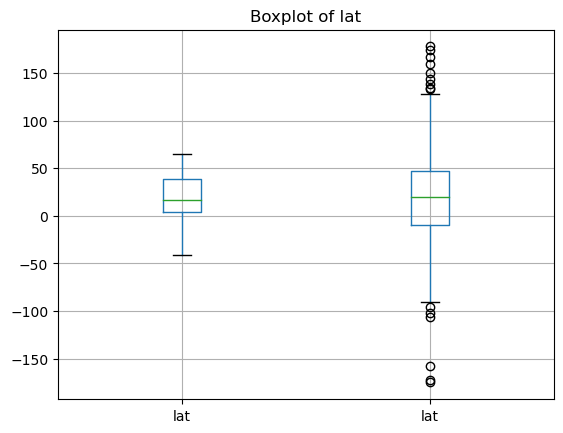

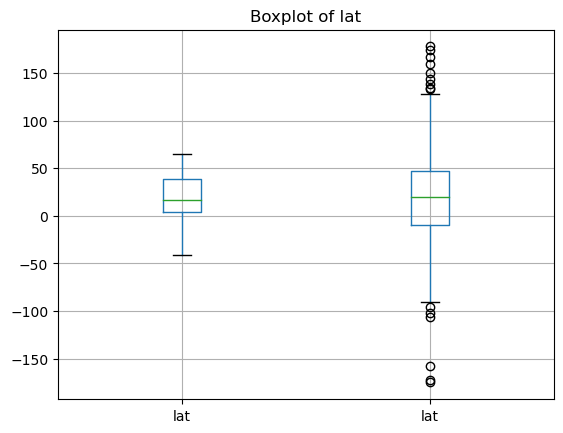

In [67]:
# Showing boxplots of the continuous variables. First I will make a new dataframe with only the continuous variables. 
df_continuous = df.drop(columns = ['cap_city', 'lang'])

# Using matplotlib to make a boxplot of the continuous variables. 
for col in df_continuous.columns:           # Iterate through columns, and boxplot
    plt.figure() 
    df_continuous.boxplot(column = col)
    plt.title('Boxplot of {}'.format(col))
    plt.show()

Looking at these variables, there are some outliers. This would include most notably land_area, GDP, CPI, CPI change, and unemployment. These outliers, however, make sense given the nature of these variables. Countries vary largely in size, cost of living, GDP generation, and how many people are working. Therefore, I will not strip these outliers for these variables as each country is different and not always comparable to others. 

In [68]:
# Finally! Making a new csv file
df.to_csv('data.csv')

### Brainstorming UI Components for Dashboard
- I could include an dropdown component that allows the user to pick a country, and when they do so, a world map will change based on this.
- I could use radio buttons to try to segment the different data categories for the user to switch through (i.e. demographics, economics, political).
- I could use a list to display rows of general information about a selected country, that is connected to the dropdown for the world map. This could include information such as the population, density, land area, capital, official language, etc.
- I could use a progress indicator (a loading icon) that would appear when the data is loading/changing when the user clicks on the different radio buttons. 


### Data Visualizations
1. A 2-D or 3-D map that uses Geopandas or another package to display the longitude and latitude coordinates for the user to see where the country is on a map

2. A scatter plot showing the relationship between the GDP and Co2 emissions by country (maybe having a dropdown for user to pick a maximum of 5 countries to compare)

3. A treemap to show the Co2 emissions of the all the countries with year at the bottom (2023)

4. A bubble chart showing the relationship between GDP and unemployment

5. A scatter plot comparing infant mortality and out of pocket health expenditures

# Data Dictionary 

|Variable|Variable Name in Dataframe|Operational Meaning/Definition|
|---------|---------|---------|
|Country|Country| Name of the Country, as a string|
|Agricultural Land (%)|agr_land| Percentage of the land area of the country that is used for agriculture. Percentage stripped and value is a float|
|Land Area|land_area|Total land area of the country in square kilometers (Km^2), float|
|Birth Rate|Birth Rate|Number of births / 1,000 people per year, as a float
|Capital City/Major City|cap_city|Name of the capital or major city in the country, as a string|
|CO2-Emissions|Co2|Carbon dioxide emissions measured in tons, measured as a float|
|CPI|CPI|Consumer Price Index (CPI), the average change over time consumers pay for a basket of items (i.e. houshold items). Measured as a float|
CPI Change (%)|CPI_change| The percentage change in the CPI compared to the previous year (2022), measured as a float|
Fertility Rate|fert_rate|Average number of children born to a woman during her lifetime, measured as a float|
Gasoline Price|gas|Price of gasoline per liter in USD for all countries, measured as a float|
GDP|GDP|Gross Domestic Product (GDP), which is the total value of goods and services produced in the country, all values standardized to USD. The value is divded by a million instead of its raw value. Measured as a float|
Infant mortality|child_death|Number of deaths per 1,000 live births before reaching one year of age, measured as a float|
Official language|lang|Official language spoken in the country, measured as a string|
Out of pocket health expenditure|health_cost|Percentage of total health expenditure paid out-of-pocket by individuals, measured as a float|
Population|pop|Total population of the country, as a raw number. Measured as an integer|
Tax revenue (%)|tax_rev| Tax revenue as a percentage of GDP, measured as a float|
Unemployment rate|unemploy|Percentage of the labor force, not looking at total population, that is unemployed. Measured as a float|
Latitude|lat|Latitude coordinate of the country, measured as a float|
Longitude|long|Longitude coordinate of the country, measured as a float| 